# Analysis of Labor between Ethnicity and Gender


## Description
This analysis aims to look for patterns and/or correlations between labor status in the US (eg. employed, unemployed, civilian labor force) and other factors such as ethnicity (eg. White, Asian, African-American) and gender (eg. male or female). These will be compared against each other to provide different insights into what may be related with each other. In order to expand on this analysis, other datasets with other factors such as cost of living and average income may be included as this notebook is being developed. Also, datasets with more up-to-date labor data may be included as well. The primary libraries that will be used are pandas and matplotlib, although other libraries may be used depending on what the other datasets may require for cleaning or web scraping. 

## Data Source(s)
Labor Data from CORGIS (Up to 2015): https://corgis-edu.github.io/corgis/csv/labor/

(TO BE EXPANDED LATER)

## Motivation
The primary motivation for analyzing this data is to see if there are any noticeable differences between groups of people when it comes to labor in the US. Employment (or rather, unemployment) is a very important part of people's lives, and discovering if there are clear biases in "intrinsic factors" will make it easier to figure out why these biases exist. In other words, using objective analysis can make it easier for proper political discussion to lead the right direction and for the general public to understand what employment trends are.

## Questions to Answer
- Are there major differences in employment between ethnicities in the US?
- Are men or women more likely to be employed in the US?
- Is there a specific combination of ethnicity and gender that is more likely to be employed or less likely to be employed?
- What is the most common type of employment for a given ethnicity or gender?
(TO BE EXPANDED LATER)

# Imports and Data Collection

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

In [14]:
def pdcorgis(a):
  inputText = a.lower()
  url = 'https://corgis-edu.github.io/corgis/csv/' + inputText + '/'
  
  response = requests.get(url)
  html_string = response.text
  document = BeautifulSoup(html_string, "html.parser")
  links = document.find_all('a')
  
  for i in links:
    if i.has_attr('download'):
      hrefVar = i['href']
  
  newURL = url + hrefVar
  dataframe = pd.read_csv(newURL)
  
  return dataframe

In [18]:
df1 = pdcorgis('labor')
df1.head()

Time.Month Time.Month Name  Time.Year  \
0           1         January       1972   
1           2        February       1972   
2           3           March       1972   
3           4           April       1972   
4           5             May       1972   

   Data.Civilian Noninstitutional Population.Asian  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Data.Civilian Noninstitutional Population.Black or African American  \
0                                            14332.0                     
1                                            14381.0                     
2                                            14401.0                     
3                                            14434.0                     
4                                            14486.0                     

   Data.Civilian Noninstitutional Population.White  \
0                                         126749.0   
1                                         126976.0   
2                                         127191.0   
3                                         127372.0   
4                                         127601.0   

   Data.Not In Labor Force.Asian  \
0                            0.0   
1                            0.0   
2                            0.0   
3                            0.0   
4                            0.0   

   Data.Not In Labor Force.Black or African American  \
0                                             5998.0   
1                                             5943.0   
2                                             5857.0   
3                                             5952.0   
4                                             5914.0   

   Data.Not In Labor Force.White  Data.Civilian Labor Force.Asian.Counts  ...  \
0                            0.0                                     0.0  ...   
1                            0.0                                     0.0  ...   
2                            0.0                                     0.0  ...   
3                            0.0                                     0.0  ...   
4                            0.0                                     0.0  ...   

   Data.Unemployed.Black or African American.Counts.Women  \
0                                              343.0        
1                                              311.0        
2                                              329.0        
3                                              260.0        
4                                              297.0        

   Data.Unemployed.Black or African American.Unemployment Rate.All  \
0                                               11.6                 
1                                               11.5                 
2                                               10.7                 
3                                                9.2                 
4                                                9.3                 

   Data.Unemployed.Black or African American.Unemployment Rate.Men  \
0                                                9.0                 
1                                                8.8                 
2                                                8.1                 
3                                                6.9                 
4                                                6.9                 

   Data.Unemployed.Black or African American.Unemployment Rate.Women  \
0                                                9.8                   
1                                                8.9                   
2                                                9.3                   
3                                                7.4                   
4                                

In [ ]:
# Boxes below are reserved for future data collection

# Exploratory Data Visualizations

In [140]:
year = df1['Time.Year']
white_unem = df1['Data.Unemployed.White.Counts.All']
black_unem = df1['Data.Unemployed.Black or African American.Counts.All']

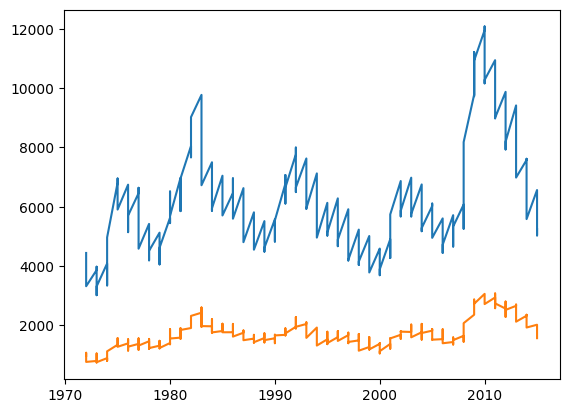

In [131]:
fig, ax = plt.subplots()
ax.plot(year, whiteunem)
ax.plot(year, blackunem)

In [138]:
yearsgrouped = df1['Time.Year'].unique()
male_unem_june = df1.loc[df1['Time.Month Name']=='June', 'Data.Unemployed.White.Unemployment Rate.Men']
female_unem_june = df1.loc[df1['Time.Month Name']=='June', 'Data.Unemployed.White.Unemployment Rate.Women']

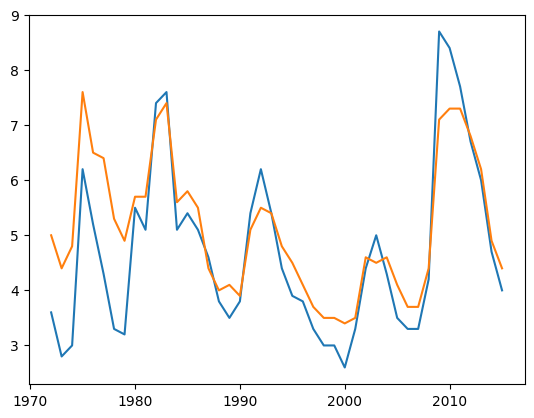

In [139]:
fig, ax = plt.subplots()
ax.plot(yearsgrouped, male_unem_june)
ax.plot(yearsgrouped, female_unem_june)

In [136]:
monthsgrouped = df1['Time.Month Name'].unique()
asia_employ_2000 = df1.loc[df1['Time.Year']==2000, 'Data.Employed.Asian.Counts']
asia_unemploy_2000 = df1.loc[df1['Time.Year']==2000, 'Data.Unemployed.Asian.Counts']

<BarContainer object of 12 artists>

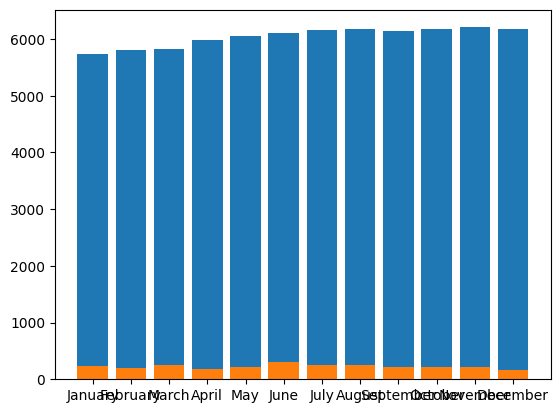

In [137]:
fig, ax = plt.subplots()
ax.bar(monthsgrouped, asia_employ_2000)
ax.bar(monthsgrouped, asia_unemploy_2000)

In [134]:
asia_notlabor = df1.groupby('Time.Year')['Data.Not In Labor Force.Asian'].sum()
black_notlabor = df1.groupby('Time.Year')['Data.Not In Labor Force.Black or African American'].sum()
white_notlabor = df1.groupby('Time.Year')['Data.Not In Labor Force.White'].sum()

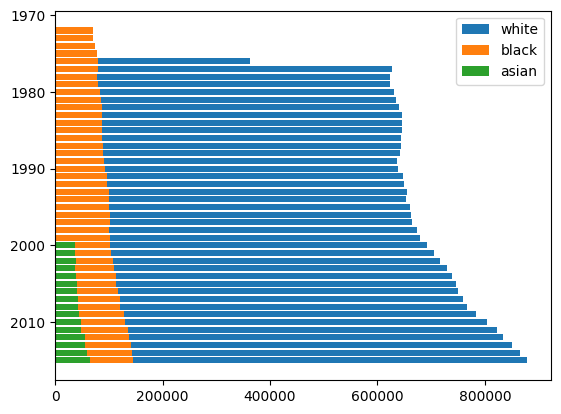

In [135]:
fig, ax = plt.subplots()
ax.barh(yearsgrouped, white_notlabor, label='white')
ax.barh(yearsgrouped, black_notlabor, label='black')
ax.barh(yearsgrouped, asia_notlabor, label='asian')
ax.invert_yaxis()
ax.legend()

- Data stretches from 1972 to 2015 completely from month to month
- The data is mostly complete for White and African American, but is noticeably missing everything before 2000 for Asians
- Noticeable gap of "Not in Labor" for White between 1972 and 1976


- Data is sectioned by status of employment, then ethnicity, then type of data (eg. count, rate, etc.)
- Most data is of a float type, but some are strings or integers when relevant
- Years and Months need to be enumerated in order to properly visualize trends


- Comparison between male and female should be relatively straightforward since they are already separated
- Rates and ratios are percentages, but are of the float type
- Time.Month is mostly irrelevant, since Time.Month Name exists and is essentially the same thing

# Analytical Data Visualizations

In [129]:
#Potential data organization code for first visualization
white_empl_ratio_male = df1.groupby('Time.Year')['Data.Employed.White.Employment-Population Ratio.Men'].sum()
black_empl_ratio_male = df1.groupby('Time.Year')['Data.Employed.Black or African American.Employment-Population Ratio.Men'].sum()

In [128]:
#Potential data organization code for second visualization
white_empl_ratio_female = df1.groupby('Time.Year')['Data.Employed.White.Employment-Population Ratio.Women'].sum()
black_empl_ratio_female = df1.groupby('Time.Year')['Data.Employed.Black or African American.Employment-Population Ratio.Women'].sum()

In [141]:
#Potential data organization code for third visualization
white_unem_grouped = df1.groupby('Time.Year')['Data.Unemployed.White.Counts.All'].sum()
white_emp = df1.groupby('Time.Year')['Data.Employed.White.Counts.All'].sum()
white_civil = df1.groupby('Time.Year')['Data.Civilian Labor Force.White.Counts.All'].sum()
#white_notlabor is already done

black_unem_grouped = df1.groupby('Time.Year')['Data.Unemployed.Black or African American.Counts.All'].sum()
black_emp = df1.groupby('Time.Year')['Data.Employed.Black or African American.Counts.All'].sum()
black_civil = df1.groupby('Time.Year')['Data.Civilian Labor Force.Black or African American.Participation Rate.All'].sum()
#black_notlabor is already done

asia_unem_grouped = df1.groupby('Time.Year')['Data.Unemployed.Asian.Counts'].sum()
asia_emp = df1.groupby('Time.Year')['Data.Employed.Asian.Counts'].sum()
asia_civil = df1.groupby('Time.Year')['Data.Civilian Labor Force.Asian.Counts'].sum()
#asia_notlabor is already done


In [142]:
#Potential data organization code for fourth visualization
total_unem = white_unem_grouped + black_unem_grouped + asia_unem_grouped
total_emp = white_emp + black_emp + asia_emp

In [ ]:
#First Visualization: Bar Plot of Employment Ratio for Males between White and Black (with respect to years)

#Second Visualization: Bar Plot of Employment Ratio for Females between White and Black (with respect to years)

#Third Visualization: Line Plot of Unemployed, Employed, Civilian Labor Force, and Not in Labor for every race

#Fourth Visualization: Histogram of all unemployed people and Histogram of all employed people

#More visualizations after more data collection and when the narrative is defined more

In [ ]:
#Boxes below for more analytical data visualizations